In [ ]:
 # !curl -s https://course.fast.ai/setup/colab | bash
 !pip install git+https://github.com/fastai/fastai.git

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-6xnqcula
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-6xnqcula
     |████████████████████████████████| 61kB 5.5MB/s 
  Created wheel for fastai: filename=fastai-2.2.4-cp36-none-any.whl size=190066 sha256=894ec90d995f1ae278e9472d83c938c6442ae2212e9c0886a3034351b15deb4f
  Stored in directory: /tmp/pip-ephem-wheel-cache-yugh9u1r/wheels/cf/46/39/b2d08762125ed2376861976ab2c4ac30c029b86e375735d9b8
Successfully built fastai
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
!wget https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz
!tar -xvzf yelp_review_polarity_csv.tgz


--2021-01-21 18:12:43--  https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.187.29
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.187.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166373201 (159M) [application/x-tar]
Saving to: ‘yelp_review_polarity_csv.tgz’

yelp_review_polarit 100%[===================>] 158.67M  38.8MB/s    in 4.4s    

2021-01-21 18:12:48 (36.4 MB/s) - ‘yelp_review_polarity_csv.tgz’ saved [166373201/166373201]

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv


In [ ]:
from fastai.text.all import * 
import pandas as pd
from pathlib import Path

In [ ]:
path = Path('yelp_review_polarity_csv')
train_csv = path/'train.csv'
train = pd.read_csv(train_csv, header=None) 
train = train.iloc[:250000,:]
train
#path = untar_data(URLs.IMDB)
#files = get_text_files(path, folders = ['train','test','unsup'])


,0,1
0,1,"Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff. It seems that his staff simply never answers the phone. It usually takes 2 hours of repeated calling to get an answer. Who has time for that or wants to deal with it? I have run into this problem with many other doctors and I just don't get it. You have office workers, you have patients with medical needs, why isn't anyone answering the phone? It's incomprehensible and not work the aggravation. It's with regret that I..."
1,2,"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life."
2,1,"I don't know what Dr. Goldberg was like before moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through this guy is a joke. And to make matters even worse, his office staff is incompetent. 90% of the time when you c..."
3,1,"I'm writing this review to give you a heads up before you see this Doctor. The office staff and administration are very unprofessional. I left a message with multiple people regarding my bill, and no one ever called me back. I had to hound them to get an answer about my bill. \n\nSecond, and most important, make sure your insurance is going to cover Dr. Goldberg's visits and blood work. He recommended to me that I get a physical, and he knew I was a student because I told him. I got the physical done. Later, I found out my health insurance doesn't pay for preventative visits. I received an..."
4,2,"All the food is great here. But the best thing they have is their wings. Their wings are simply fantastic!! The \""Wet Cajun\"" are by the best & most popular. I also like the seasoned salt wings. Wing Night is Monday & Wednesday night, $0.75 whole wings!\n\nThe dining area is nice. Very family friendly! The bar is very nice is well. This place is truly a Yinzer's dream!! \""Pittsburgh Dad\"" would love this place n'at!!"
...,...,...
249995,2,"Honestly this was the best meal with my family in a very long time. Not only is this place absolutely beautiful, the staff is friendly and knowledgeable and the food is amazing! I had the spiked cherry limeade with my dinner (yum!). We also had both the calamari and the alligator and appetizers. My husband and daughter had steak and lobster and I had the grilled shrimp brochettes. Each dish was fresh and flavorful! Not a dud in the bunch. We had a wonderful time and are looking forward to returning."
249996,1,"Much disappointment :(\n\nThis place has great reviews, but I am not sure why..\n\n 1) There is poor communication and timing in the kitchen\n 2) The food represented online/in yelp/on menus are grossly misrepresented\n 3) Food is average\n 4) Staff needs training on how to pronounce menu items\n \n\nI came here with a group of 8. We started by ordering the Crispy Fried Alligator, Crab Fingers (saut\u00e9ed), Frog Legs, and Calamari. The Alligator was the best thing we ate the entire meal.\n\nThe Crab Fingers were mediocre and very messy. The Frog Legs were average, and the Calamar..."
249997,2,"HIGHLY RECOMMENDED: if you're looking for the best oysters in town, look no further than Pappadeaux. I typicall

In [ ]:
valid_csv = path/'test.csv'
valid = pd.read_csv(valid_csv, header=None) 
valid = valid.iloc[:25000,:]
valid

,0,1
0,2,"Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \nAnd they ..."
1,1,"Last summer I had an appointment to get new tires and had to wait a super long time. I also went in this week for them to fix a minor problem with a tire they put on. They \""fixed\"" it for free, and the very next morning I had the same issue. I called to complain, and the \""manager\"" didn't even apologize!!! So frustrated. Never going back. They seem overpriced, too."
2,2,"Friendly staff, same starbucks fair you get anywhere else. Sometimes the lines can get long."
3,1,"The food is good. Unfortunately the service is very hit or miss. The main issue seems to be with the kitchen, the waiters and waitresses are often very apologetic for the long waits and it's pretty obvious that some of them avoid the tables after taking the initial order to avoid hearing complaints."
4,2,"Even when we didn't have a car Filene's Basement was worth the bus trip to the Waterfront. I always find something (usually I find 3-4 things and spend about $60) and better still, I am always still wearing the clothes and shoes 3 months later. \n\nI kind of suspect this is the best shopping in Pittsburgh; it's much better than the usual department stores, better than Marshall's and TJ Maxx and better than the Saks downtown, even when it has a sale. Selection, bargains AND quality.\n\nI like this Filene's better than Gabriel Brothers, which are harder to get to. Gabriel Brothers are a real..."
...,...,...
24995,1,"I went to JL Nails on the recommendation of a neighbor. On my initial visit I went in for a mani-pedi, my treat to myself for Mother's Day. The staff was (is) extremely friendly but the place is a mess. The pedicure was better than I've had in a while and my nails looked pretty. I went in today to get my eyebrows waxed because it's closer than the salon I usually go to and I was in a bit of a hurry. When I went to lay down the towel covering the headrest was dirty and had hair on it. Then, when she handed me the mirror to check out my brows I couldn't see through the grime. I was really d..."
24996,1,"Liars!!!!!! Went in this evening to order iPhone 6, when told shipping dates was told that Space Gray 128GB would ship within 24 hours, and 64 GB would be two weeks, so I decide I wanted my new toy and paid a little more for the 128 GB. leave store all happy. 30 minutes later get email that will ship in 7 to 14 business days. I immediately call the store, phone rolls over to a voice mail box not set up- for 32 minutes. then if course store closes."
24997,2,"There are really good bargains to be discovered here.\n\nThis location is always clean and organized. Even during holiday shopping season, this store is kept up well.\n\nThe staff is friendly and are quick to assist if you need help."
24998,2,"Hibachi is normally related to Japanese name. however, I notice all the Asian worker speak Northern CHINESE. \n\nThe place is very clean - as expected - it is a new.\n\nthe food: good selection, good salad bar, very reasonable price, fresh. it taste approximately equal to other Asian buffet. All good."


In [ ]:
df_lm = pd.concat([train, valid], axis=0)[[1]]
df_lm


#data_lm = TextLMDataBunch.from_csv(path, 'train.csv')
#data_clas = TextClasDataBunch.from_csv(path, 'test.csv', vocab=data_lm.train_ds.vocab, bs=bs)

,1
0,"Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff. It seems that his staff simply never answers the phone. It usually takes 2 hours of repeated calling to get an answer. Who has time for that or wants to deal with it? I have run into this problem with many other doctors and I just don't get it. You have office workers, you have patients with medical needs, why isn't anyone answering the phone? It's incomprehensible and not work the aggravation. It's with regret that I..."
1,"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life."
2,"I don't know what Dr. Goldberg was like before moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through this guy is a joke. And to make matters even worse, his office staff is incompetent. 90% of the time when you c..."
3,"I'm writing this review to give you a heads up before you see this Doctor. The office staff and administration are very unprofessional. I left a message with multiple people regarding my bill, and no one ever called me back. I had to hound them to get an answer about my bill. \n\nSecond, and most important, make sure your insurance is going to cover Dr. Goldberg's visits and blood work. He recommended to me that I get a physical, and he knew I was a student because I told him. I got the physical done. Later, I found out my health insurance doesn't pay for preventative visits. I received an..."
4,"All the food is great here. But the best thing they have is their wings. Their wings are simply fantastic!! The \""Wet Cajun\"" are by the best & most popular. I also like the seasoned salt wings. Wing Night is Monday & Wednesday night, $0.75 whole wings!\n\nThe dining area is nice. Very family friendly! The bar is very nice is well. This place is truly a Yinzer's dream!! \""Pittsburgh Dad\"" would love this place n'at!!"
...,...
24995,"I went to JL Nails on the recommendation of a neighbor. On my initial visit I went in for a mani-pedi, my treat to myself for Mother's Day. The staff was (is) extremely friendly but the place is a mess. The pedicure was better than I've had in a while and my nails looked pretty. I went in today to get my eyebrows waxed because it's closer than the salon I usually go to and I was in a bit of a hurry. When I went to lay down the towel covering the headrest was dirty and had hair on it. Then, when she handed me the mirror to check out my brows I couldn't see through the grime. I was really d..."
24996,"Liars!!!!!! Went in this evening to order iPhone 6, when told shipping dates was told that Space Gray 128GB would ship within 24 hours, and 64 GB would be two weeks, so I decide I wanted my new toy and paid a little more for the 128 GB. leave store all happy. 30 minutes later get email that will ship in 7 to 14 business days. I immediately call the store, phone rolls over to a voice mail box not set up- for 32 minutes. then if course store closes."
24997,"There are really good bargains to be discovered here.\n\nThis location is always clean and organized. Even during holiday shopping season, this store is kept up well.\n\nThe staff is

In [ ]:
dls_lm = DataBlock(
    blocks=TextBlock.from_df(0, is_lm=True),
    get_x=ColReader(0), 
    splitter=RandomSplitter(0.33) 
    # using only 10% of entire comments data for validation inorder to learn more
)

In [ ]:
dls_lm = dls_lm.dataloaders(df_lm, bs=64, seq_len=72)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
dls_lm.show_batch(max_n=2)

,text,text_
0,xxbos xxmaj my girlfriend took my mini xxmaj australian xxmaj shepard here today as this is where her doggie goes . xxmaj i 'm not sure what was going through their mind when they shaved her all the way down . xxmaj seems to like there were lazy and did n't want to take the time to give her a proper groom . xxmaj hair was unevenly cut . xxmaj she 's,xxmaj my girlfriend took my mini xxmaj australian xxmaj shepard here today as this is where her doggie goes . xxmaj i 'm not sure what was going through their mind when they shaved her all the way down . xxmaj seems to like there were lazy and did n't want to take the time to give her a proper groom . xxmaj hair was unevenly cut . xxmaj she 's a
1,"could n't very well complain to the manager about the shady tactics to take advantage of my fleet company . xxmaj i 'm sure he does the same things to other customers ; however , it is with their hard earned money . xxmaj i 'm sure people who do n't know much about vehicle maintenance believe it really costs $ 100 for an oil change . xxmaj do not go here","n't very well complain to the manager about the shady tactics to take advantage of my fleet company . xxmaj i 'm sure he does the same things to other customers ; however , it is with their hard earned money . xxmaj i 'm sure people who do n't know much about vehicle maintenance believe it really costs $ 100 for an oil change . xxmaj do not go here unless"


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3,
    metrics=[accuracy, Perplexity()]).to_fp16()

In [ ]:
learn.lr_find()

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.05754399299621582)

Error in callback <function flush_figures at 0x7f74e97a1d90> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
learn.fit_one_cycle(1, 0.0020)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.848728,3.756200,0.294983,42.785545,1:19:58


SuggestedLRs(lr_min=0.004786301031708717, lr_steep=2.75422871709452e-06)

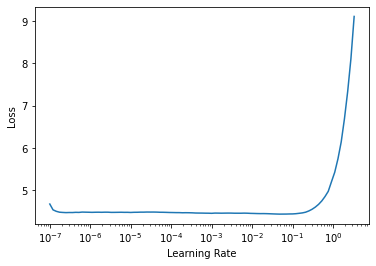

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 4e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.308240,4.046049,0.264014,57.171135,00:29
1,4.099257,3.919182,0.273064,50.359211,00:29
2,3.954669,3.872129,0.277054,48.044563,00:29
3,3.851216,3.853387,0.278197,47.152481,00:29
4,3.809251,3.850917,0.278161,47.036190,00:29


SuggestedLRs(lr_min=8.317637839354575e-05, lr_steep=2.0892961401841603e-05)

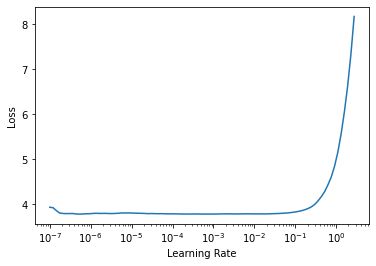

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 5e-5)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.792396,3.850670,0.278198,47.024563,00:29
1,3.792301,3.850176,0.278434,47.001316,00:29
2,3.793777,3.849820,0.278233,46.984623,00:29
3,3.790492,3.849641,0.278186,46.976189,00:29
4,3.792973,3.849616,0.278196,46.975037,00:29


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir

Mounted at /content/gdrive


In [ ]:
dest=Path(base_dir + "yelp/yelpfinetuneLM/")
try:
  dest.mkdir(parents=True, exist_ok=False)
except FileExistsError:
  print ('File Already Exists')

File Already Exists


In [ ]:
learn.save(dest/'11epoch2K')

Path('/content/gdrive/My Drive/yelp/yelpfinetuneLM/11epoch2K.pth')

In [ ]:
learn.save_encoder(dest/'finetuned2K')

In [ ]:
blocks = (TextBlock.from_df(0, seq_len=dls_lm.seq_len, vocab=dls_lm.vocab), CategoryBlock())
dls = DataBlock(blocks=blocks,
                get_x=ColReader(1),
                get_y=ColReader(0),
                splitter=RandomSplitter(0.3))


In [ ]:
train = train.iloc[:250000,:]
train

,0,1
0,1,"Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff. It seems that his staff simply never answers the phone. It usually takes 2 hours of repeated calling to get an answer. Who has time for that or wants to deal with it? I have run into this problem with many other doctors and I just don't get it. You have office workers, you have patients with medical needs, why isn't anyone answering the phone? It's incomprehensible and not work the aggravation. It's with regret that I..."
1,2,"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life."
2,1,"I don't know what Dr. Goldberg was like before moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through this guy is a joke. And to make matters even worse, his office staff is incompetent. 90% of the time when you c..."
3,1,"I'm writing this review to give you a heads up before you see this Doctor. The office staff and administration are very unprofessional. I left a message with multiple people regarding my bill, and no one ever called me back. I had to hound them to get an answer about my bill. \n\nSecond, and most important, make sure your insurance is going to cover Dr. Goldberg's visits and blood work. He recommended to me that I get a physical, and he knew I was a student because I told him. I got the physical done. Later, I found out my health insurance doesn't pay for preventative visits. I received an..."
4,2,"All the food is great here. But the best thing they have is their wings. Their wings are simply fantastic!! The \""Wet Cajun\"" are by the best & most popular. I also like the seasoned salt wings. Wing Night is Monday & Wednesday night, $0.75 whole wings!\n\nThe dining area is nice. Very family friendly! The bar is very nice is well. This place is truly a Yinzer's dream!! \""Pittsburgh Dad\"" would love this place n'at!!"
...,...,...
249995,2,"Honestly this was the best meal with my family in a very long time. Not only is this place absolutely beautiful, the staff is friendly and knowledgeable and the food is amazing! I had the spiked cherry limeade with my dinner (yum!). We also had both the calamari and the alligator and appetizers. My husband and daughter had steak and lobster and I had the grilled shrimp brochettes. Each dish was fresh and flavorful! Not a dud in the bunch. We had a wonderful time and are looking forward to returning."
249996,1,"Much disappointment :(\n\nThis place has great reviews, but I am not sure why..\n\n 1) There is poor communication and timing in the kitchen\n 2) The food represented online/in yelp/on menus are grossly misrepresented\n 3) Food is average\n 4) Staff needs training on how to pronounce menu items\n \n\nI came here with a group of 8. We started by ordering the Crispy Fried Alligator, Crab Fingers (saut\u00e9ed), Frog Legs, and Calamari. The Alligator was the best thing we ate the entire meal.\n\nThe Crab Fingers were mediocre and very messy. The Frog Legs were average, and the Calamar..."
249997,2,"HIGHLY RECOMMENDED: if you're looking for the best oysters in town, look no further than Pappadeaux. I typicall

In [ ]:

dls = dls.dataloaders(train, bs=64)

In [ ]:
dls.show_batch(max_n=3)

,text,category
0,"xxbos xxup birthday xxup for xxup hubby xxup ugh \n xxmaj first of all i booked this on xxmaj priceline , i booked a room with a separate living space . xxmaj it did not happen that way at checkin . xxup we xxup were actually given a standard room . \n\n xxmaj we also called the hotel directly on xxmaj may 10th , to verify the bedding would be hypo allergenic ( no goose or down at all ) , i requested a fridge for a medical need , and a baby crib too . i was also promised a beech credit of 50 . i recorded the call to verify all was ready to go . \n\n xxmaj we selected the m xxup bay for the pools , shark reef exhibit , and the it being on the end of the strip , with the boys . \n\n",1
1,"xxbos xxup so disappointed in xxmaj caesar 's xxmaj palace this trip ! \n\n xxmaj our trip was going really well , until one morning ! xxmaj we had spent the night gambling , so we did n't wake up for awhile the next day . xxmaj when we did wake up , we heard strange noises in our bathroom ! i got out of bed to realize , xxup there xxup had xxup been xxup black xxup gunk xxup and xxup goo xxup splattering xxup out xxup of xxup the xxup drain xxup from xxup our xxup sink ! talk about disgusting ! xxmaj we hurried to remove our things from the area before it had splattered onto our tooth brushes and toiletries ! xxmaj there was xxup black xxup water xxup and xxup hair xxup that xxup came xxup from xxup the xxup drain xxup of xxup the",1
2,"xxbos xxmaj in the worst of times people often think of the best of times . xxmaj rex is no exception . xxmaj gather around kids and let xxmaj uncle xxmaj rex tell you a story … when xxmaj rex was a small child he spent many a month on the xxmaj east xxmaj coast . xxmaj it was a magical time . xxmaj my father , who beat young xxmaj rex mercilessly if xxmaj rex called him anything but "" the xxmaj future xxmaj husband of the xxmaj multi xxmaj talented xxmaj pia xxmaj zadora "" , was originally from the xxmaj northeast . xxmaj my father was an odd man , a brutal man , a man with big dreams and small child like hands . xxmaj on my fifth birthday he brought xxmaj rex with him as he knocked over a 7 - 11 . xxmaj as",1


In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5,
                                metrics=accuracy).to_fp16()

In [ ]:
learn = learn.load_encoder(dest/'finetuned2K')

SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.00363078061491251)

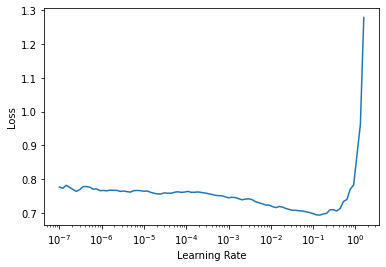

In [ ]:
learn.lr_find()

In [ ]:
#finetuning the classifier
learn.fit_one_cycle(1, 1.4e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.552827,0.492075,0.765720,10:54


SuggestedLRs(lr_min=0.017378008365631102, lr_steep=1.0964781722577754e-06)

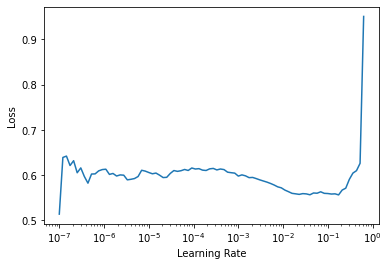

In [ ]:
learn.lr_find()

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),2e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.307645,0.334562,0.907120,11:08


SuggestedLRs(lr_min=0.0015848932787775993, lr_steep=1.3182567499825382e-06)

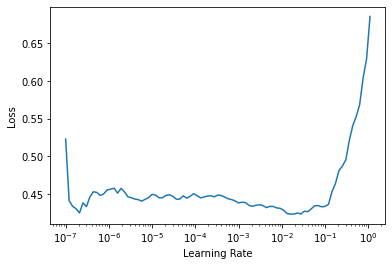

In [ ]:
learn.lr_find()

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.222427,0.178975,0.928867,11:47


SuggestedLRs(lr_min=0.00043651582673192023, lr_steep=1.0964781722577754e-06)

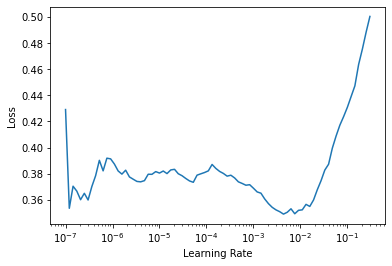

In [ ]:
learn.lr_find()

In [ ]:
learn.unfreeze
learn.fit_one_cycle(1, slice(1e-5/(2.6**4),3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.195288,0.333228,0.928907,11:36


SuggestedLRs(lr_min=0.0015848932787775993, lr_steep=0.0063095735386013985)

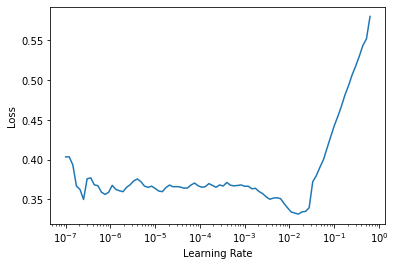

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, 0.00063)

epoch,train_loss,valid_loss,accuracy,time
0,0.194072,0.163100,0.938760,11:38
